# Visualizing the Titanic Disaster - Juan de Dios González Hedström

### Introduction:

This exercise is based on the titanic Disaster dataset avaiable at [Kaggle](https://www.kaggle.com/c/titanic).  
To know more about the variables check [here](https://www.kaggle.com/c/titanic/data)

It is recomended also to use **seaborn** library

### Step 1. Import the necessary libraries

In [1]:
%matplotlib inline

import pandas as pd # Librería pandas
import numpy as np # Libraría numpy
import matplotlib.pyplot as plt # Librería de plots
import seaborn as sns # Plots con estadísticas avanzadas

### Step 2. Import the dataset from titanic.csv 

### Step 3. Assign it to a variable titanic 

In [2]:
titanic = pd.read_csv('data/titanic.csv', sep=',')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 4. Set PassengerId as the index 

In [3]:
titanic = titanic.set_index('PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 5. Create a pairplot to check how variables correlate

/anaconda/envs/Environment1/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/anaconda/envs/Environment1/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda/envs/Environment1/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda/envs/Environment1/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


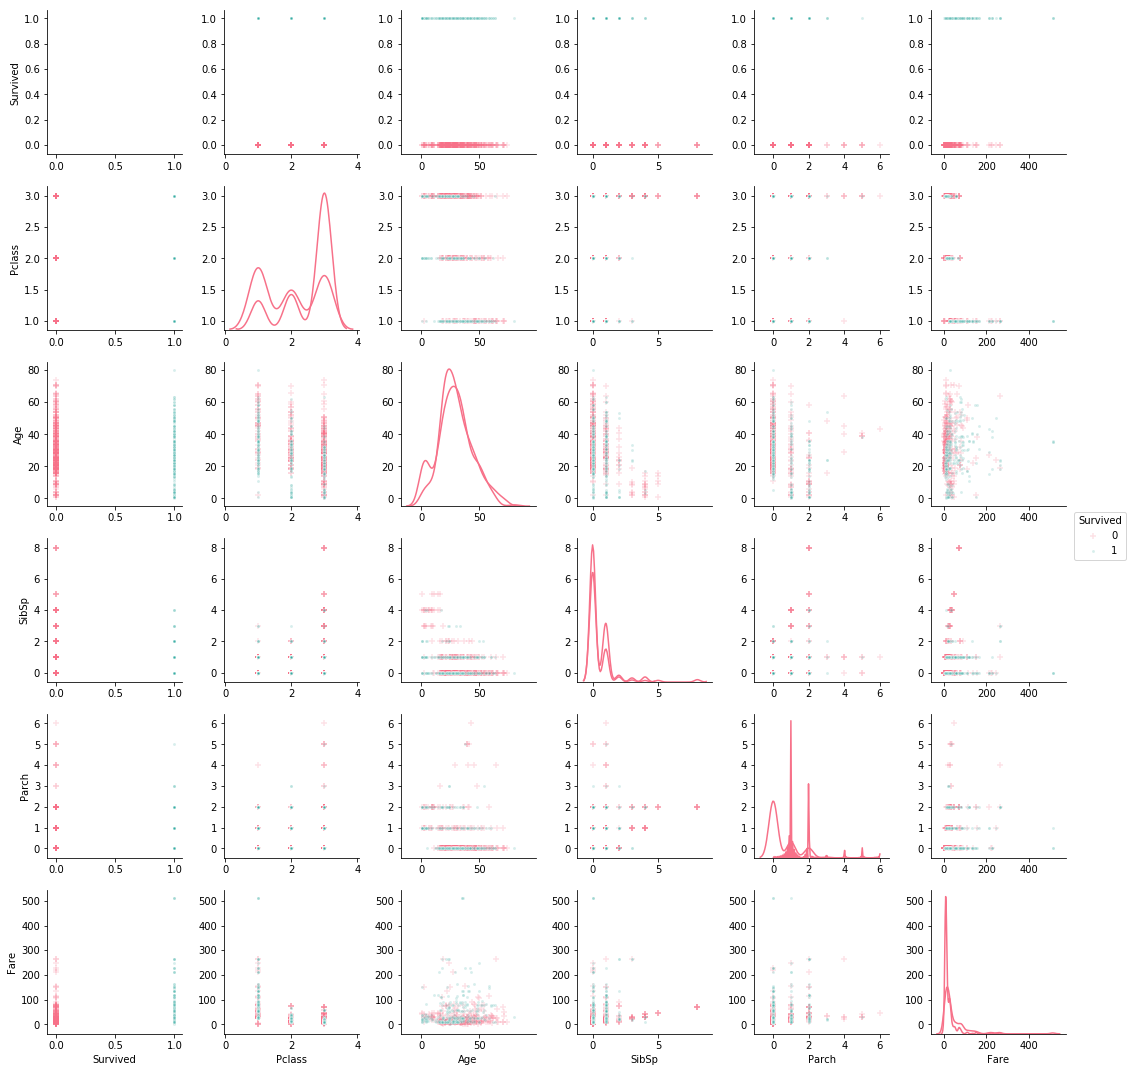

In [4]:
sns.pairplot(data = titanic,
             hue='Survived', # Los agrupamos por supervivencia
             diag_kind='kde', # En la diagonal mostramos la densidad de las varialbes
             palette="husl",
             markers=["+", "."],
             plot_kws={'alpha': 0.2}) # La transparencia de los puntos

A simple vista uno no parece obtener correlaciones entre la supervivencia y el resto de variables. Si que puede parecer que la gente más jóven sobrevivía más que el resto. Otra cosa que se puede ver es que los pasajeros más jóvenes solían viajar con la menor clase (clase 3), la más barata.

### Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

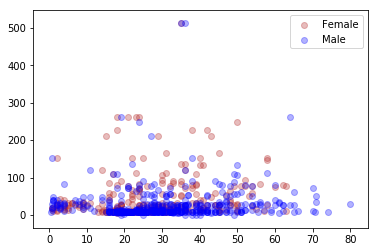

In [5]:
plt.scatter(titanic[titanic['Sex']=='female'].Age, titanic[titanic['Sex']=='female'].Fare, 
            c="firebrick", alpha=0.3, label='Female')
plt.scatter(titanic[titanic['Sex']=='male'].Age, titanic[titanic['Sex']=='male'].Fare, 
            c="blue", alpha=0.3, label='Male')
plt.legend()
plt.show()

### Step 7. How many people survived?

Para ello, primero de todo añadiremos una columna al dataframe al cual se le asignará el valor 1 a cada pasajero. Este nos será útil para luego al agrupar el dataframe por supervivencia sólo tener que contar el número de 'Count' que hay para los '0' y para los '1', y así saber cuántos pasajeros sobrevivieron y cuántos no.

In [6]:
vector_Count = []
for idx in range(len(titanic)):
    vector_Count.append(1)
vector_Count = pd.DataFrame(vector_Count)
titanic[['Count']] = vector_Count
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Count
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0


In [7]:
survived_groups = titanic.groupby('Survived') # Creamos la agrupación
survived_groups.sum()[['Count']]

,Count
Survived,
0,548.0
1,342.0


Sobrevivieron 342 pasajeros. Los otros 548 murieron.

Eliminemos la columna creada que ya no hará falta:

In [8]:
column_to_drop = "Count"
titanic = titanic.drop(column_to_drop, axis = 1)

### Step 8. Create a histogram with the Fare payed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1078831d0>]], dtype=object)

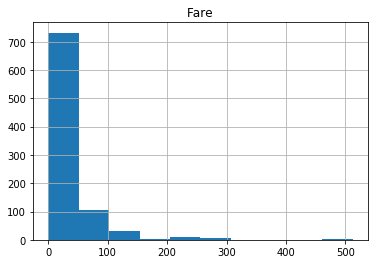

In [9]:
titanic.hist(column='Fare')

### Step 9: Create a diagonal correlation plot af all variables ([tip](http://seaborn.pydata.org/examples/many_pairwise_correlations.html))

Primero de todo, creamos la función que hace este plot de las correlaciones:

In [10]:
def correlation_plot(df, cols=None):
    """
    Dada una matriz de correlación, genera un heatmap para visualizar
    las correlaciones entre las variables.
    """
    
    sns.set(style="white")
    if cols:
        corr = df[cols].corr()
    else:
        corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

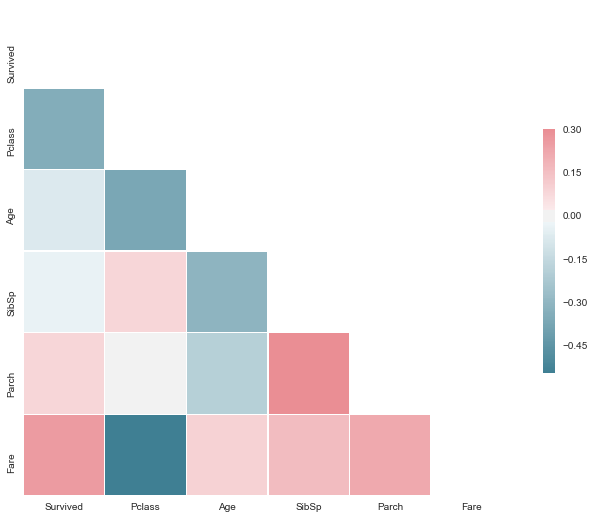

In [11]:
correlation_plot(titanic, cols=['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'])

A primera vista, parece ser que hay una 'alta' (0.30) correlación positiva entre los diferentes números de familiares. Tabién hay otra de estas correlaciones destacadas entre la Superviviencia y el Fare (precio del billete). Por otro lado, entre las correlaciones negativas más destacadas esta la del precio y Pclass (clase de billete). Esta correlación es esperada ya que a peor clase (que es mayor Pclass, la tercera clase) más barato es el billete.